In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from google.colab import files

import tensorflow as tf
tf.compat.v1.disable_eager_execution()

from keras.datasets import mnist
from tensorflow.python.keras.layers import *
from tensorflow.python.keras.layers.advanced_activations import LeakyReLU
from tensorflow.python.keras.models import Sequential,Model
from tensorflow.compat.v1.keras.optimizers import Adam

Using TensorFlow backend.


(60000, 28, 28) (10000, 28, 28)


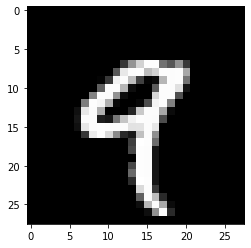

In [2]:
# Load MNIST Data
(x_train, _), (x_test, _) = mnist.load_data()
print(x_train.shape, x_test.shape)

plt.imshow(x_train[4], cmap='gray')
plt.show()

In [3]:
X_train = np.vstack((x_train, x_test))
X_train = X_train.reshape((-1, 784))
print(X_train.shape)

# Normalize data to range [-1, 1]
X_train = (X_train.astype('float32') - 127.5) / 127.5
print(X_train.min(), X_train.max())

(70000, 784)
-1.0 1.0


In [0]:
TOTAL_EPOCHS = 50
BATCH_SIZE = 256
HALF_BATCH = 128
NO_OF_BATCHES = int(X_train.shape[0] / BATCH_SIZE)

NOISE_DIM = 100  # Upsample this into 784 DIM vector
adam = Adam(lr=1e-4, beta_1=0.5)

In [5]:
# Generator 
# Input- Noise(DIM 100) Output- Image(DIM 784)

generator = Sequential()
generator.add(Dense(256, input_shape=(NOISE_DIM, )))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784, activation='tanh'))

generator.compile(optimizer=adam, loss='binary_crossentropy')
generator.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               25856     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 1024)              0         
_________________________________________

In [6]:
# Discriminator 
# Input- Image(DIM 784)  Output- Class(DIM 1)
discriminator = Sequential()
discriminator.add(Dense(512, input_shape=(784, )))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(16))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1, activation='sigmoid'))

discriminator.compile(optimizer=adam, loss='binary_crossentropy')
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                4112      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [7]:
# GAN Training Step-2
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM, ))
gen_img = generator(gan_input)
gan_output = discriminator(gen_img)

model = Model(gan_input, gan_output)
model.compile(optimizer=adam, loss='binary_crossentropy')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential (Sequential)      (None, 784)               1486352   
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 537377    
Total params: 2,023,729
Trainable params: 1,486,352
Non-trainable params: 537,377
_________________________________________________________________


In [0]:
!mkdir images

def save_images(epoch, samples = 100):
    noise = np.random.normal(0, 1, size=(samples, NOISE_DIM))
    pred_imgs = generator.predict(noise)
    pred_imgs = pred_imgs.reshape((-1, 28, 28))
    
    plt.figure(figsize=(10, 10))
    for i in range(samples):
        plt.subplot(10, 10, i+1)
        plt.imshow(pred_imgs[i], cmap='gray')
        plt.axis('off')
        
    plt.tight_layout()
    plt.savefig("images/gan_pred_imgs_{0}.png".format(epoch+1))
    plt.show()

Epoch 1 - Dis. loss- 0.6211, Gen. Loss- 0.6211
Epoch 2 - Dis. loss- 0.5880, Gen. Loss- 0.5880
Epoch 3 - Dis. loss- 0.5846, Gen. Loss- 0.5846
Epoch 4 - Dis. loss- 0.5752, Gen. Loss- 0.5752
Epoch 5 - Dis. loss- 0.5561, Gen. Loss- 0.5561


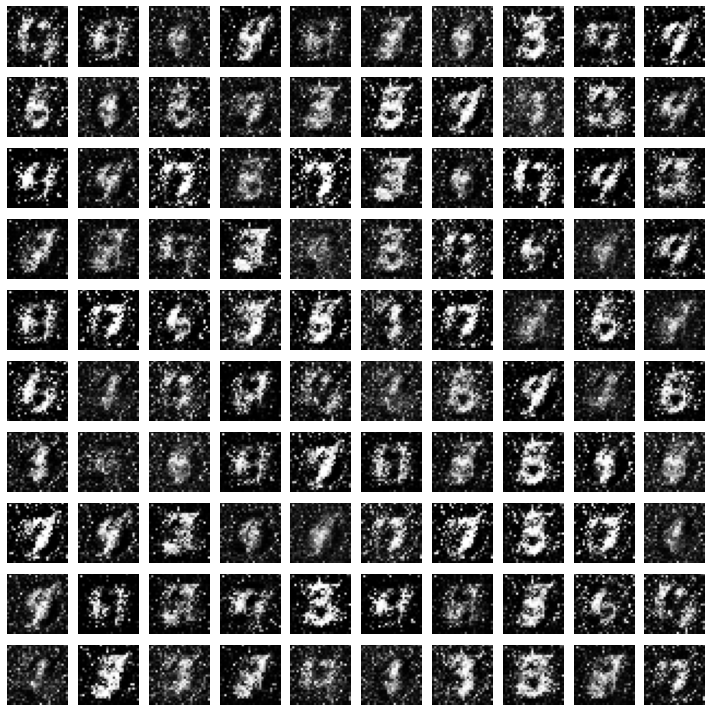

Epoch 6 - Dis. loss- 0.5540, Gen. Loss- 0.5540
Epoch 7 - Dis. loss- 0.5316, Gen. Loss- 0.5316
Epoch 8 - Dis. loss- 0.5176, Gen. Loss- 0.5176
Epoch 9 - Dis. loss- 0.5133, Gen. Loss- 0.5133
Epoch 10 - Dis. loss- 0.5320, Gen. Loss- 0.5320


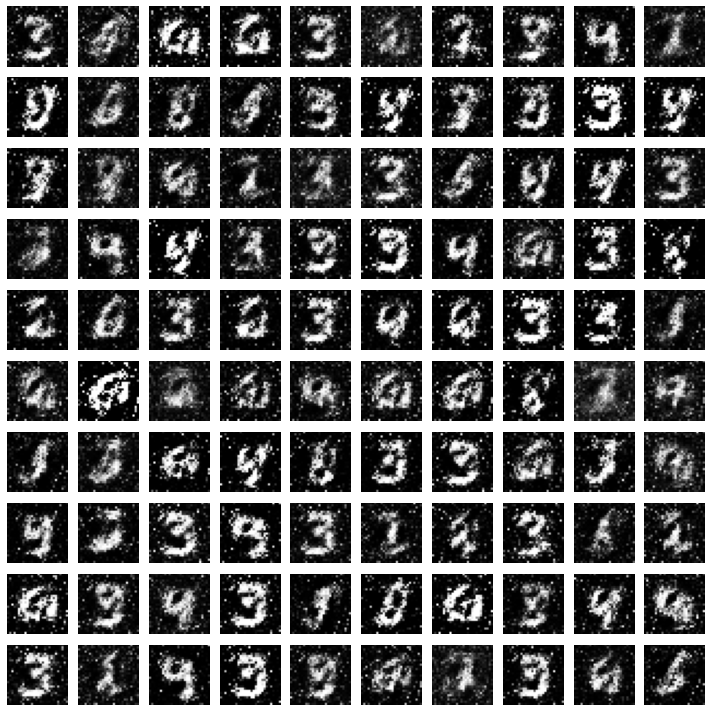

Epoch 11 - Dis. loss- 0.5385, Gen. Loss- 0.5385
Epoch 12 - Dis. loss- 0.5612, Gen. Loss- 0.5612
Epoch 13 - Dis. loss- 0.5627, Gen. Loss- 0.5627
Epoch 14 - Dis. loss- 0.5557, Gen. Loss- 0.5557
Epoch 15 - Dis. loss- 0.5753, Gen. Loss- 0.5753


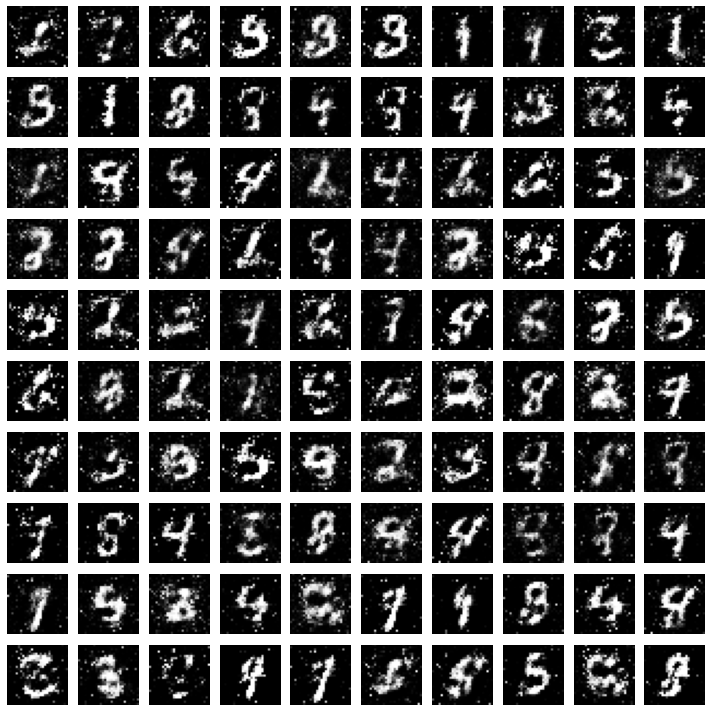

Epoch 16 - Dis. loss- 0.5744, Gen. Loss- 0.5744
Epoch 17 - Dis. loss- 0.5731, Gen. Loss- 0.5731
Epoch 18 - Dis. loss- 0.5959, Gen. Loss- 0.5959
Epoch 19 - Dis. loss- 0.6093, Gen. Loss- 0.6093
Epoch 20 - Dis. loss- 0.6023, Gen. Loss- 0.6023


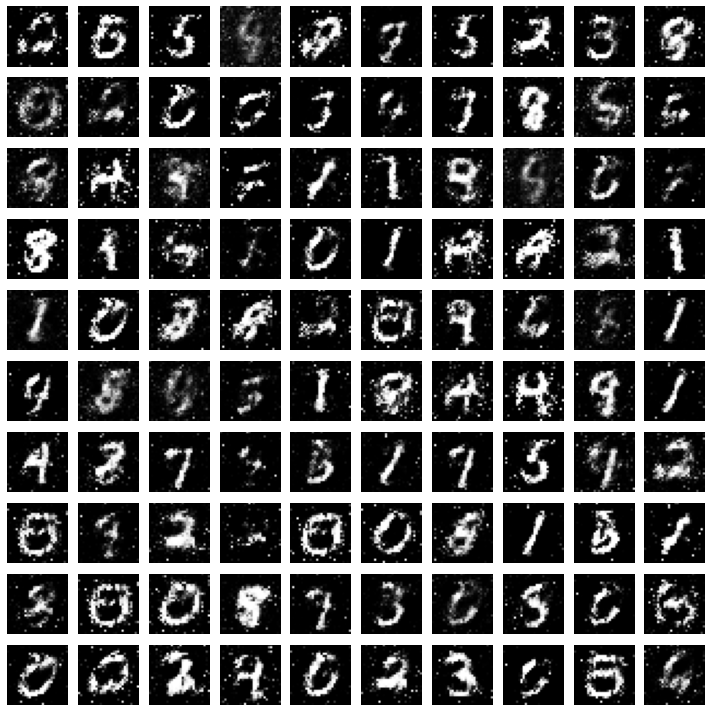

Epoch 21 - Dis. loss- 0.6118, Gen. Loss- 0.6118
Epoch 22 - Dis. loss- 0.6220, Gen. Loss- 0.6220
Epoch 23 - Dis. loss- 0.6156, Gen. Loss- 0.6156
Epoch 24 - Dis. loss- 0.6153, Gen. Loss- 0.6153
Epoch 25 - Dis. loss- 0.6154, Gen. Loss- 0.6154


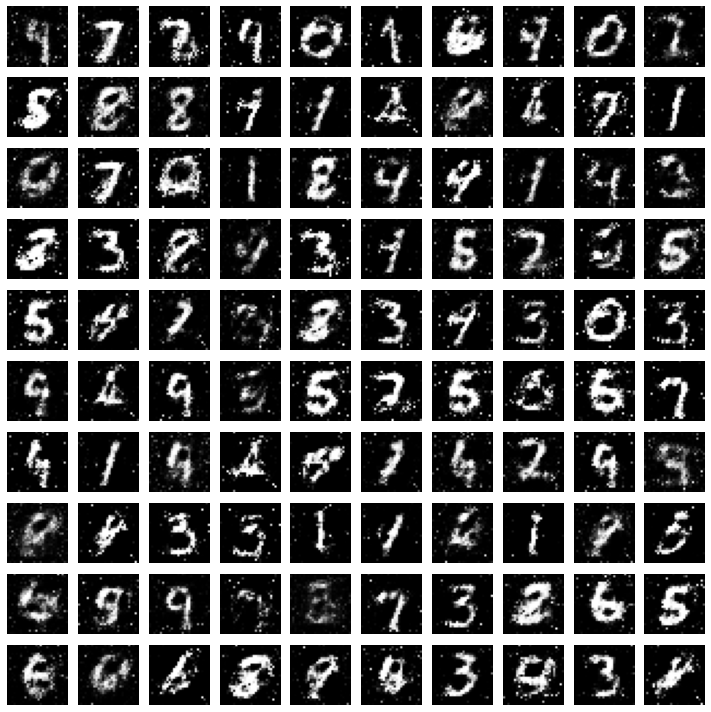

Epoch 26 - Dis. loss- 0.6222, Gen. Loss- 0.6222
Epoch 27 - Dis. loss- 0.6204, Gen. Loss- 0.6204
Epoch 28 - Dis. loss- 0.6258, Gen. Loss- 0.6258
Epoch 29 - Dis. loss- 0.6236, Gen. Loss- 0.6236
Epoch 30 - Dis. loss- 0.6223, Gen. Loss- 0.6223


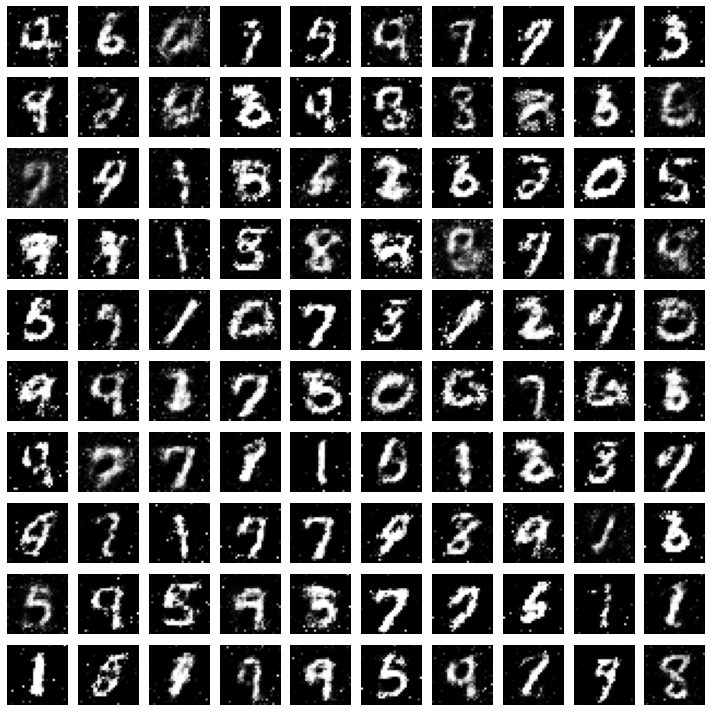

Epoch 31 - Dis. loss- 0.6261, Gen. Loss- 0.6261
Epoch 32 - Dis. loss- 0.6235, Gen. Loss- 0.6235
Epoch 33 - Dis. loss- 0.6256, Gen. Loss- 0.6256
Epoch 34 - Dis. loss- 0.6265, Gen. Loss- 0.6265
Epoch 35 - Dis. loss- 0.6263, Gen. Loss- 0.6263


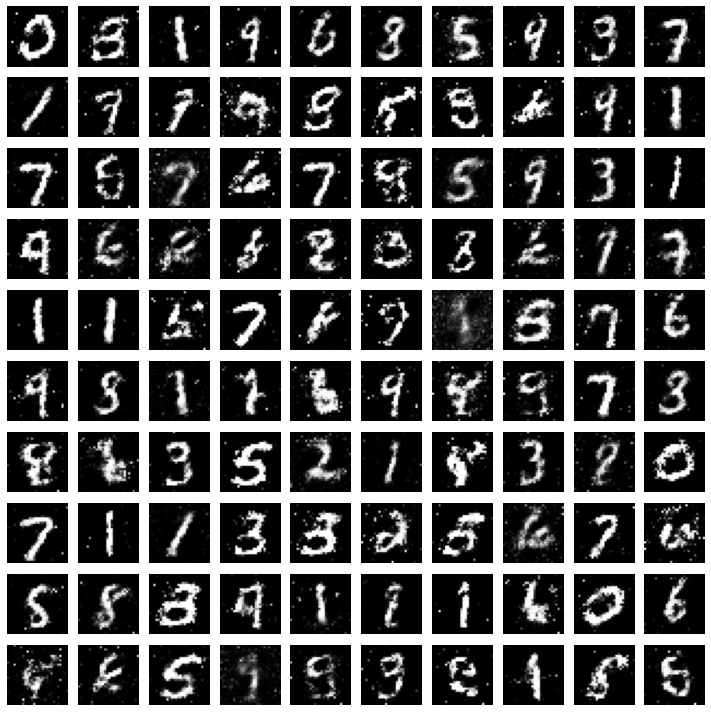

Epoch 36 - Dis. loss- 0.6188, Gen. Loss- 0.6188
Epoch 37 - Dis. loss- 0.6236, Gen. Loss- 0.6236
Epoch 38 - Dis. loss- 0.6220, Gen. Loss- 0.6220
Epoch 39 - Dis. loss- 0.6211, Gen. Loss- 0.6211
Epoch 40 - Dis. loss- 0.6226, Gen. Loss- 0.6226


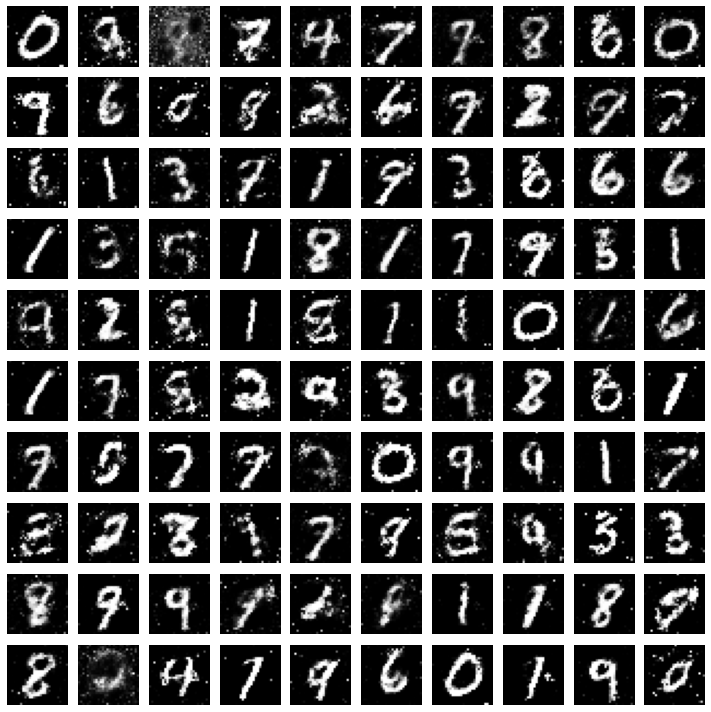

Epoch 41 - Dis. loss- 0.6222, Gen. Loss- 0.6222
Epoch 42 - Dis. loss- 0.6228, Gen. Loss- 0.6228
Epoch 43 - Dis. loss- 0.6181, Gen. Loss- 0.6181
Epoch 44 - Dis. loss- 0.6202, Gen. Loss- 0.6202
Epoch 45 - Dis. loss- 0.6172, Gen. Loss- 0.6172


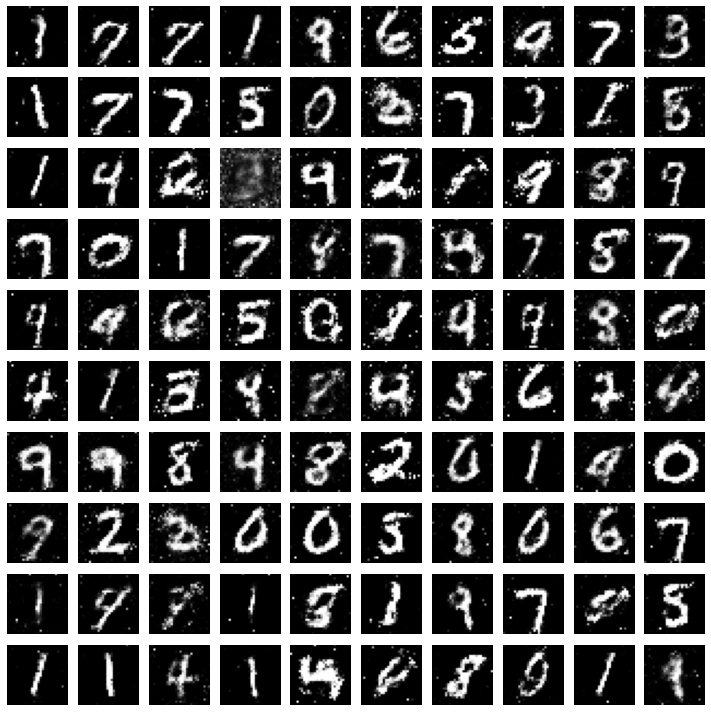

Epoch 46 - Dis. loss- 0.6124, Gen. Loss- 0.6124
Epoch 47 - Dis. loss- 0.6114, Gen. Loss- 0.6114
Epoch 48 - Dis. loss- 0.6100, Gen. Loss- 0.6100
Epoch 49 - Dis. loss- 0.6099, Gen. Loss- 0.6099
Epoch 50 - Dis. loss- 0.6160, Gen. Loss- 0.6160


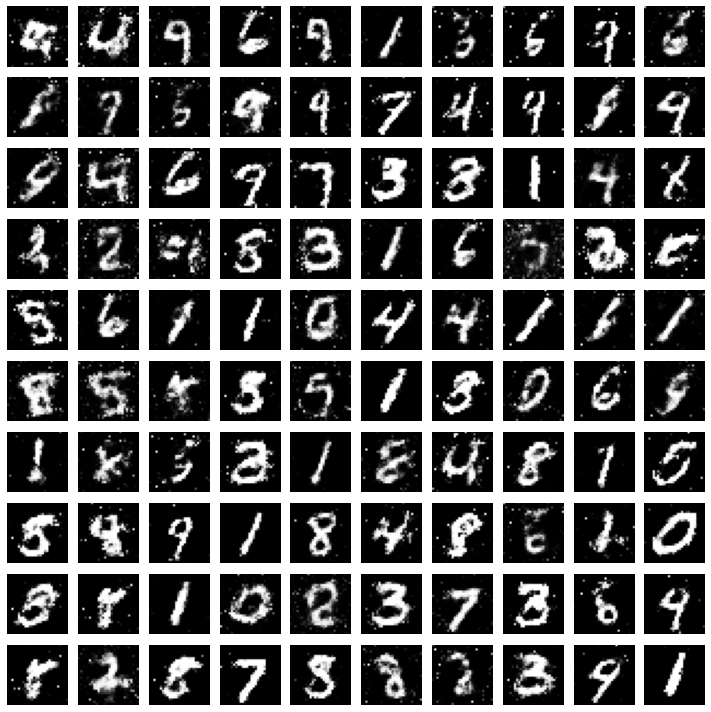

In [11]:
# Training loop
dis_loss = []
gen_loss = []

for epoch in range(TOTAL_EPOCHS):
    epoch_d_loss = 0.
    epoch_g_loss = 0.
    
    # Mini batch SGD
    for step in range(NO_OF_BATCHES):
        # Step-1 Discriminator training
        # 50% Real data + 50% Fake data
        
        # Real data X
        idxs = np.random.randint(0, X_train.shape[0], HALF_BATCH)
        real_imgs = X_train[idxs]
        
        # Fake data X
        noise = np.random.normal(0, 1, size=(HALF_BATCH, NOISE_DIM))
        fake_imgs = generator.predict(noise)
        
        # Labels
        real_y = np.ones((HALF_BATCH, 1)) * 0.9  # One sided label smoothing
        fake_y = np.zeros((HALF_BATCH, 1))
        
        d_loss_real = discriminator.train_on_batch(real_imgs, real_y)
        d_loss_fake = discriminator.train_on_batch(fake_imgs, fake_y)
        epoch_d_loss += 0.5*d_loss_real + 0.5*d_loss_fake
        
        # Generator Training (considering Frozen Discriminator)
        noise = np.random.normal(0, 1, size=(BATCH_SIZE, NOISE_DIM))
        ground_truth_y = np.ones((BATCH_SIZE, 1))
        g_loss = model.train_on_batch(noise, ground_truth_y)
        epoch_g_loss += g_loss
        
    dis_loss.append(epoch_d_loss/NO_OF_BATCHES)
    gen_loss.append(epoch_g_loss/NO_OF_BATCHES)
    
    print("Epoch %d - Dis. loss- %.4f, Gen. Loss- %.4f"%(
        (epoch+1), epoch_d_loss/NO_OF_BATCHES, epoch_d_loss/NO_OF_BATCHES))
    
    if ((epoch+1)%5) == 0:
        generator.save('model_gan_gen_{0}.h5'.format(epoch+1))
        save_images(epoch)

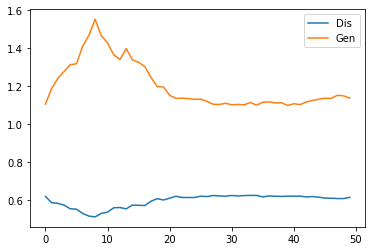

In [12]:
# Plot Losses
plt.plot(dis_loss, label='Dis')
plt.plot(gen_loss, label='Gen')
plt.legend()
plt.show()

In [14]:
!zip -r /content/images.zip /content/images
files.download('images.zip')

  adding: content/images/ (stored 0%)
  adding: content/images/gan_pred_imgs_35.png (deflated 6%)
  adding: content/images/gan_pred_imgs_15.png (deflated 5%)
  adding: content/images/gan_pred_imgs_40.png (deflated 6%)
  adding: content/images/gan_pred_imgs_20.png (deflated 5%)
  adding: content/images/gan_pred_imgs_50.png (deflated 6%)
  adding: content/images/gan_pred_imgs_5.png (deflated 5%)
  adding: content/images/gan_pred_imgs_25.png (deflated 6%)
  adding: content/images/gan_pred_imgs_10.png (deflated 5%)
  adding: content/images/gan_pred_imgs_30.png (deflated 6%)
  adding: content/images/gan_pred_imgs_45.png (deflated 6%)
